### 성능지표 - classification
- Accuracy                  : (TN+TP) / (TN+EP+EN+TP)
- Precison                  : TP / (FN+TP)
- Recall == Sensitivity     : TP / (FN+TP)
- F1-Score                  : (Precision*Recall) / (Precision+Recall) * 2
- Confusion matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix

In [22]:
digit_data = load_digits(as_frame=True)

In [23]:
# feature & label
# 0 ~ 9 number image
image_df = digit_data['data']

# 0 ~ 9 image label
label_sr = digit_data['target']

In [24]:
label_sr.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
label_sr.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [26]:
# binary classification을 위해 7과 나머지 라벨 변경
mask = (label_sr==7)
find_sevem_sr = label_sr.copy()
find_sevem_sr[~mask] = 0
find_sevem_sr[mask] = 1
find_sevem_sr.value_counts()

target
0    1618
1     179
Name: count, dtype: int64

In [27]:
label_sr.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [30]:
# train : test = 8 : 2
# stratify: find_seven_sr
# random_state: 31

X_train, X_test, y_train, y_test = train_test_split(image_df, find_sevem_sr, stratify=find_sevem_sr, test_size=0.2, random_state=31)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train & test ratio: {len(X_train)/len(image_df)*100:.2f} %, {len(X_test)/len(image_df)*100:.2f} %")

X train: (1437, 64), 2D
y train: (1437,), 1D

X test: (360, 64), 2D
y test: (360,), 1D

train & test ratio: 79.97 %, 20.03 %


In [40]:
print(f"[train ratio]: {(y_train.value_counts()/y_train.shape[0])}")
print(f"[test ratio]: {y_test.value_counts()/y_test.shape[0]}")

[train ratio]: target
0    0.900487
1    0.099513
Name: count, dtype: float64
[test ratio]: target
0    0.9
1    0.1
Name: count, dtype: float64


- class 정의

In [41]:
from sklearn.base import BaseEstimator

# 사용자 정의 DummyClass: 아무것도 하지 않는 클래스, 단순 테스트용
class MyDummyClassifiter(BaseEstimator):
    
    def fit(self, X, y): pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    

In [42]:
# instance
model = MyDummyClassifiter()
model.fit(X_train, y_train)

In [47]:
pre_ = model.predict(X_train)
pre_

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

- accuracy: 0.90048
    - 불균형 데이터일 경우 신뢰 할 수 없음.

In [48]:
accuracy_score(y_train, pre_)

0.9004871259568545

In [50]:
from sklearn.metrics import classification_report

In [60]:
print(f"[train]: {y_train.value_counts()}")
print(f"[test]: {y_test.value_counts()}")

[train]: target
0    1294
1     143
Name: count, dtype: int64
[test]: target
0    324
1     36
Name: count, dtype: int64


In [72]:
y_test_ = [0,0,0,1,1, 1,0,0,0,1, 1,1,1,0,0, 0,0,0,0,0]
y_pre = [1,1,1,1,1, 1,0,1,0,1, 1,1,1,0,0, 0,0,0,0,0]

In [73]:
confusion_matrix(y_train, pre_, labels=[0, 1])

array([[1294,    0],
       [ 143,    0]], dtype=int64)

In [74]:
pre__ = model.predict(X_test)
confusion_matrix(y_test, pre__, labels=[0, 1])

array([[324,   0],
       [ 36,   0]], dtype=int64)

In [85]:
(tn, fp, fn, tp) = confusion_matrix(y_test_, y_pre).reshape(-1)
confusion_matrix(y_test_, y_pre)

array([[9, 4],
       [0, 7]], dtype=int64)

In [87]:
print(tn, tp, fn, fp)

9 7 0 4


In [88]:
TN, FP, FN, TP = confusion_matrix(y_test, pre__, labels=[0, 1]).reshape(-1)

In [89]:
print(f"TN: {TN}")
print(f"TP:{TP}")
print(f"FN: {FN}")
print(f"FP: {FP}")

TN: 324
TP:0
FN: 36
FP: 0


- train: 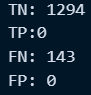
- test: 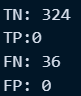

- Precision: model 중심

In [77]:
precision_score(y_train, pre_, zero_division=0)

0.0

In [78]:
precision_score(y_test, pre__, zero_division=0)

0.0

- recall: data 중심

In [79]:
recall_score(y_train, pre_)

0.0

In [80]:
recall_score(y_test, pre__)

0.0

- F1-Score

In [90]:
from sklearn.metrics import f1_score

In [91]:
f1_train = f1_score(y_train, pre_)
f1_test = f1_score(y_test, pre__)

print(f"F1-Score train: {f1_train*100:.2f} %")
print(f"f1_score test score: {f1_test*100:.2f} %")

F1-Score train: 0.00 %
f1_score test score: 0.00 %
